## Task: Train a logistic regression classifier to predict survival of passengers in titanic dataset

You are provided with code to download and load titanic dataset in the form of a csv

In the dataset, each row represents information about the passengers of titanic, Like their name, gender, class etc(See the dataframe below for more info).

The target column is 'Survived' which tells us whether this particular passenger sirvived or not

Use any of all the other columns as the input features (You can choose to drop the columns you see are not worth keeping).

Your task is to train a logistic regression model which takes the input featues (make sure to not accidentaly feed the 'Survived' column to the model as input) and predicts the whether a passenger with these features would survive or not.

Make sure to put emphasis on code quality and to include a way to judge how good your model is performing on **un-seen data (untrained data)**.

As a bonus, see if you can figure out which feature is most likely to affect the survivability of a passenger.

In [264]:
from IPython.display import clear_output

In [265]:
#Don't change this code

%pip install gdown==4.5

clear_output()

In [266]:
!gdown 18YfCgT3Rk7uYWrUzgjb2UR3Nyo9Z68bK  # Download the csv file.

Downloading...
From: https://drive.google.com/uc?id=18YfCgT3Rk7uYWrUzgjb2UR3Nyo9Z68bK
To: /home/ahmad/Desktop/KAUST/currentBestAnswer/titanic.csv
100%|██████████████████████████████████████| 60.3k/60.3k [00:01<00:00, 31.5kB/s]


In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.optim import SGD, Adam
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt



# CHECKPOINT

In [268]:
titanic_data = pd.read_csv('titanic.csv')

In [269]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [270]:
data_y = titanic_data['Survived']
data_x = titanic_data.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'Embarked', 'PassengerId']) # Drop the columns that are not needed.

In [271]:
data_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [272]:
data_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

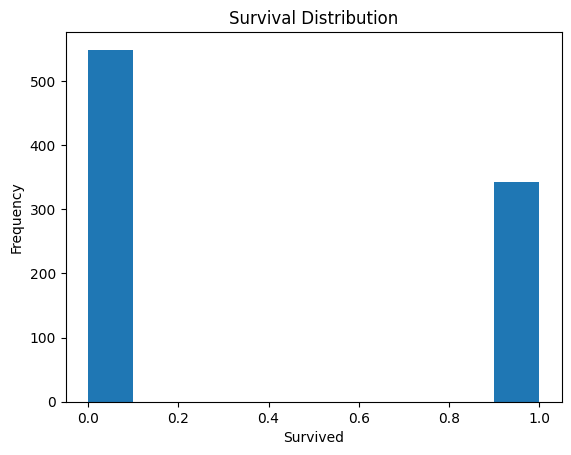

In [273]:
data_y.plot(kind='hist')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.title('Survival Distribution')
plt.show()


In [274]:
# Convert the categorical data to numerical data using one-hot encoding.
data_x['isMale'] =  data_x['Sex'].apply(lambda x: 1 if x == 'male' else 0)
data_x = data_x.drop(columns=['Sex'])
data_x = data_x.drop(columns=['Fare'])

data_x = data_x.fillna(data_x.mean())
data_x.head()


,Pclass,Age,SibSp,Parch,isMale
0,3,22.0,1,0,1
1,1,38.0,1,0,0
2,3,26.0,0,0,0
3,1,35.0,1,0,0
4,3,35.0,0,0,1


checkpoing      DELETABLE

In [275]:
X = data_x.values
y = data_y.values

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [277]:


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [278]:
X_train_scaled = torch.tensor(X_train, dtype=torch.float32)
X_test_scaled  = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test  = torch.tensor(y_test, dtype=torch.float32)

# Defining the model


In [279]:
# Torch module based model for logistic_regression
class LogisticRegression(nn.Module):
  def __init__(self, input_dim):
    super(LogisticRegression, self).__init__()
    self.linear1 = nn.Linear(input_dim, 1) 
    self.sigmoid = nn.Sigmoid()  

  def forward(self, x):
    y = self.linear1(x)
    z = self.sigmoid(y)  #sigmoid activation to get probabilites
    return z

In [280]:
input_dim = X_train.shape[1]
model = LogisticRegression(input_dim)

# Define loss function and optimizer
  # Binary Cross Entropy Loss (binary because 2 classes). Cross entropy function in torch is multi-class
criterion = nn.BCELoss() # data must be (-1,1)
optimizer = Adam(model.parameters(), lr=0.01)

num_epochs = 1000

In [281]:
train_losses = []

for epoch in range(num_epochs):
  # Forward pass
  outputs = model(X_train_scaled)
#   print(outputs)
#   print(y_train.reshape(-1,1))
#   break
  loss = criterion(outputs, y_train.reshape(-1, 1))

  # Backward pass and optimization
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  train_losses.append(loss.item())

  if (epoch + 1) % 100 == 0:
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.5710
Epoch [200/1000], Loss: 0.5434
Epoch [300/1000], Loss: 0.5226
Epoch [400/1000], Loss: 0.5082
Epoch [500/1000], Loss: 0.4980
Epoch [600/1000], Loss: 0.4901
Epoch [700/1000], Loss: 0.4836
Epoch [800/1000], Loss: 0.4780
Epoch [900/1000], Loss: 0.4732
Epoch [1000/1000], Loss: 0.4690


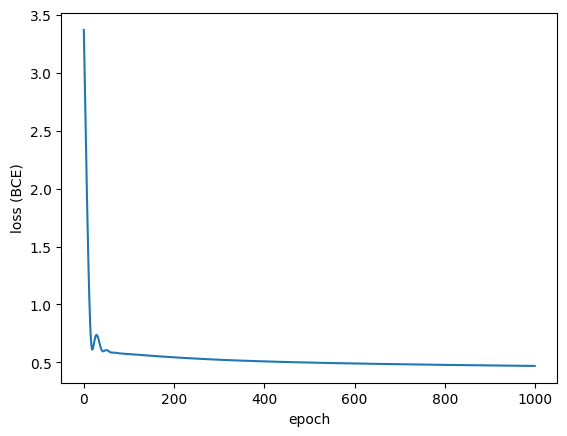

In [282]:
plt.plot(train_losses)

plt.xlabel('epoch')
plt.ylabel('loss (BCE)')

plt.show()

In [283]:
model.eval()
with torch.no_grad():

  y_pred = model(X_test_scaled)
  y_pred = (y_pred > 0.5).float()  # Convert probabilities to binary predictions (0 or 1)

  correct = (y_pred == y_test.reshape(-1,1)).sum().item() # itme is used to get the value of tensor(float)
  accuracy = correct / y_test.size(0)

  print(f'Accuracy on test set: {100 * accuracy:.2f}%')

Accuracy on test set: 79.33%
